In [1]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import scipy

In [2]:
lead_blood_in_usa = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Lead%20Poisioning/lead-blood-usa-children.csv")
legal_controls_lead_paint = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Lead%20Poisioning/legal-controls-lead-paint.csv")
print(lead_blood_in_usa)
print(legal_controls_lead_paint)

             Entity  Code  Year  Blood lead concentration (1-5 year olds)
0   95th percentile   NaN  1978                                      29.0
1   95th percentile   NaN  1990                                      12.0
2   95th percentile   NaN  1993                                       9.7
3   95th percentile   NaN  2000                                       7.0
4   95th percentile   NaN  2002                                       5.8
5   95th percentile   NaN  2004                                       5.1
6   95th percentile   NaN  2006                                       3.8
7   95th percentile   NaN  2008                                       4.1
8   95th percentile   NaN  2010                                       3.4
9   95th percentile   NaN  2012                                       2.9
10  95th percentile   NaN  2014                                       2.2
11  95th percentile   NaN  2016                                       2.8
12           Median   NaN  1978       

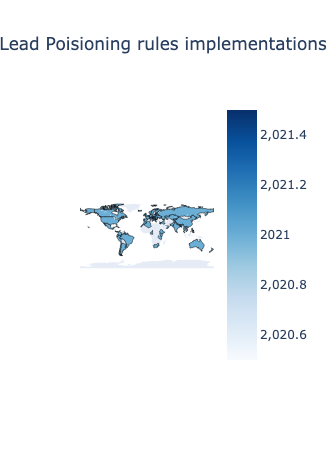

In [3]:
fig = go.Figure(data=go.Choropleth(
    locations = legal_controls_lead_paint['Entity'],
    locationmode = 'country names',
    z = legal_controls_lead_paint['Year'],
    colorscale = 'blues',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Lead Poisioning rules implementations',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    )
)

In [4]:
lead_blood_in_usa.isnull().sum()

Entity                                       0
Code                                        24
Year                                         0
Blood lead concentration (1-5 year olds)     0
dtype: int64

In [6]:
lead_blood_in_usa.drop(lead_blood_in_usa.columns[[1]], axis=1, inplace=True)
print(lead_blood_in_usa)

             Entity  Blood lead concentration (1-5 year olds)
0   95th percentile                                      29.0
1   95th percentile                                      12.0
2   95th percentile                                       9.7
3   95th percentile                                       7.0
4   95th percentile                                       5.8
5   95th percentile                                       5.1
6   95th percentile                                       3.8
7   95th percentile                                       4.1
8   95th percentile                                       3.4
9   95th percentile                                       2.9
10  95th percentile                                       2.2
11  95th percentile                                       2.8
12           Median                                      15.0
13           Median                                       3.5
14           Median                                       2.6
15      

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



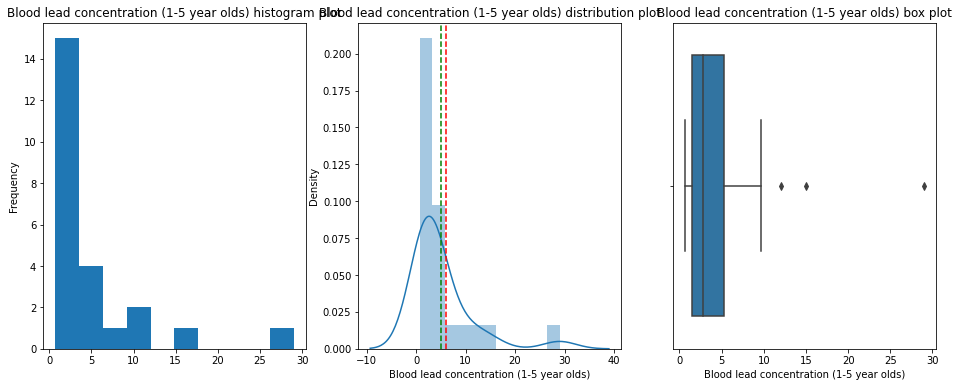

In [7]:
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()
grap = lead_blood_in_usa.select_dtypes(exclude = 'object')
for i in grap.columns:
    feat_plot(grap[i])